In [235]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

%matplotlib inline


sector_group_name_list = ['cm_cn_group_grains_oilseeds', 'cm_cn_group_livestock', 'cm_cn_group_softs',
                          'cm_cn_group_base_metal', 'cm_cn_group_black', 'cm_cn_group_chemicals', 'cm_cn_group_energy',
                          'cm_cn_group_stock_index', 'cm_cn_group_interest_rate', 'cm_cn_sector_agriculture',
                          'cm_cn_sector_industrials', 'cm_cn_sector_refineries', 'cm_cn_sector_financial', 'cm_cn_all']
fut_code_list = ['A.DCE', 'AL.SHF', 'AP.CZC', 'BU.SHF', 'C.DCE', 'CF.CZC', 'CJ.CZC', 'CS.DCE', 'CU.SHF', 'EB.DCE',
                 'EG.DCE', 'FG.CZC', 'FU.SHF', 'HC.SHF', 'IC.CFE', 'I.DCE', 'IF.CFE', 'IH.CFE', 'J.DCE', 'JD.DCE',
                 'JM.DCE', 'L.DCE', 'LH.DCE', 'MA.CZC', 'M.DCE', 'NI.SHF', 'OI.CZC', 'PB.SHF', 'P.DCE', 'PF.CZC',
                 'PG.DCE', 'PK.CZC', 'PP.DCE', 'RB.SHF', 'RM.CZC', 'RU.SHF', 'SA.CZC', 'SF.CZC', 'SM.CZC', 'SN.SHF',
                 'SP.SHF', 'SR.CZC', 'SS.SHF', 'TA.CZC', 'T.CFE', 'TF.CFE', 'TS.CFE', 'UR.CZC', 'V.DCE', 'Y.DCE',
                 'ZC.CZC', 'ZN.SHF']
mad_param=[0.2,1,2,10]
sign_switch_param=[0,30,256,512,1024]

In [236]:
parent_path='C:\\Users\\jason.huang\\research\\backtest\\single_factor_test\\cashbasis_front_contract_test\\result_no_signal_delete\\'

mad= 0.2

sign_switch= 1024

name = 'cm_cn_group_chemicals'

fee = 0

long_index=False

short_index=False

In [237]:
select_name_list=[]
for file_name in os.listdir(parent_path):
    if 'mad_'+str(mad) in file_name:
        if 'signswitch_'+str(sign_switch) in file_name:
            if long_index:
                if 'long' in file_name:
                    select_name_list.append(file_name)
            elif short_index:
                if 'short' in file_name:
                    select_name_list.append(file_name)
            else:
                if 'long' not in file_name and 'short' not in file_name:
                    select_name_list.append(file_name)
if fee == 0:
    fee_str = '_no_fee'
else:
    fee_str = ''

if '.' in name:
    sheet_name = 'cum_pnl' + fee_str
else:
    sheet_name = 'sector_cum_pnl' + fee_str

data_all=pd.DataFrame()
for i in range(len(select_name_list)):
    try:
        file_name=select_name_list[i]
        if file_name[-10:-5]=='ttm40':
            pass
        else:
            file_location=parent_path+file_name
            data=pd.read_excel(file_location,sheet_name,index_col=0)
            data=data[name]
            data=pd.DataFrame(data)
            data.columns=[file_name[:-5]]
            data_all=pd.concat([data_all,data],axis=1)
    except Exception as e:
        pass

data_all_ttm=pd.DataFrame()
for i in range(len(select_name_list)):
    try:
        file_name=select_name_list[i]
        if  file_name[-10:-5]=='ttm40':
            file_location=parent_path+file_name
            data=pd.read_excel(file_location,sheet_name,index_col=0)
            data=data[name]
            data=pd.DataFrame(data)
            data.columns=[file_name[:-5]]
            data_all_ttm=pd.concat([data_all_ttm,data],axis=1)
    except Exception as e:
        pass
data_all.columns=[x[:-4] for x in data_all.columns]
data_all = data_all.reindex(sorted(data_all.columns), axis=1)
data_all_ttm.columns=[x[:-6] for x in data_all_ttm.columns]
data_all_ttm = data_all_ttm.reindex(sorted(data_all_ttm.columns), axis=1)

Text(0.5, 1.0, 'all')

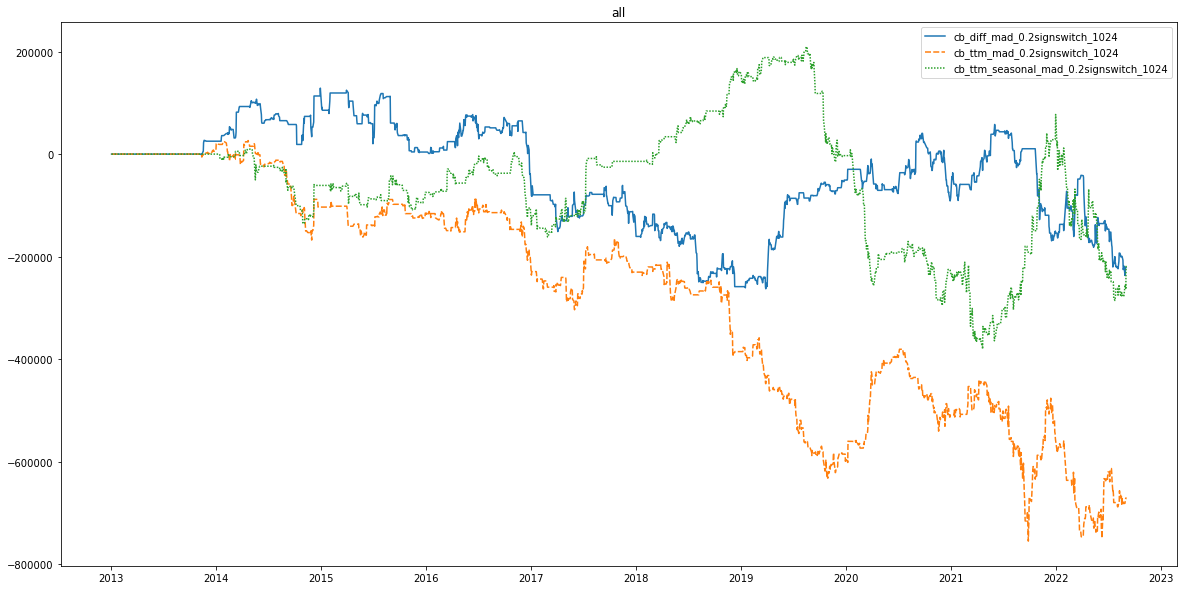

In [238]:
plt.rcParams['figure.figsize'] = [20,10]
sns.lineplot(data=data_all)
plt.title('all')

Text(0.5, 1.0, 'long short TTM40')

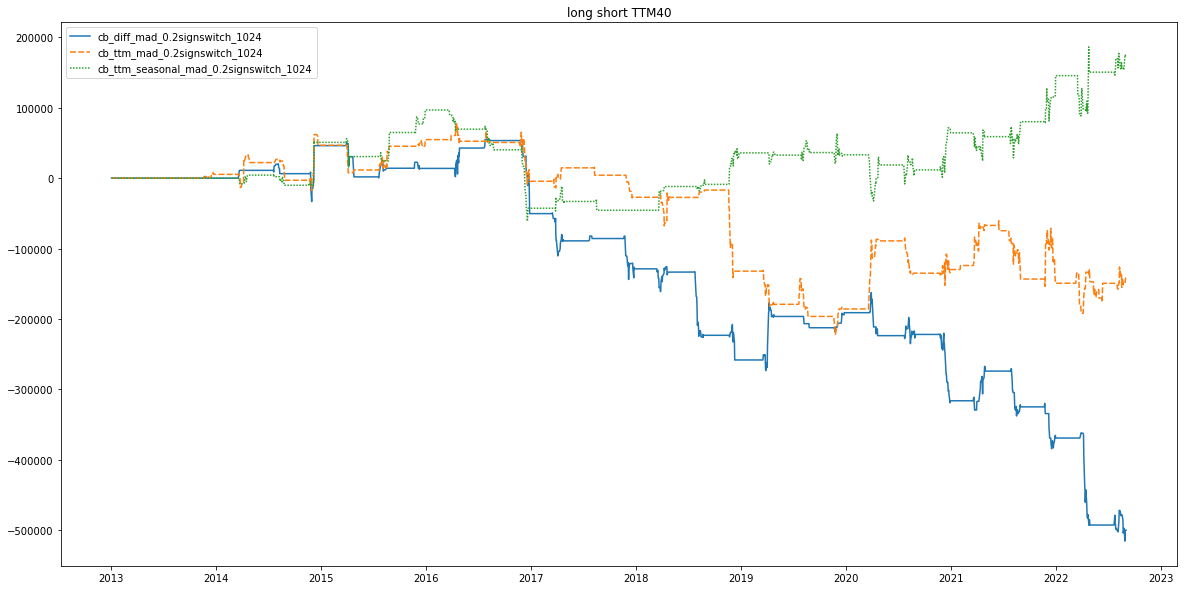

In [239]:
plt.rcParams['figure.figsize'] = [20,10]
sns.lineplot(data=data_all_ttm)
plt.title('long short TTM40')